In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
heart_dataset = pd.read_csv("heart.csv")
heart_dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart_dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
print('Number of rows are', heart_dataset.shape[0], 'and number of columns are ', heart_dataset.shape[1])

Number of rows are 302 and number of columns are  14


In [6]:
heart_dataset[heart_dataset.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
heart_dataset.drop_duplicates(keep='first', inplace=True)

In [25]:
def check_missing(dataframe):
    if dataframe.isnull().sum().sum() > 0:
        print(dataframe.isnull().sum(), '\n')
        print('There are {} missing values'.format(dataframe.isnull().sum().sum()))
    else:
        print('There are no missing values')

check_missing(heart_dataset)

There are no missing values


Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


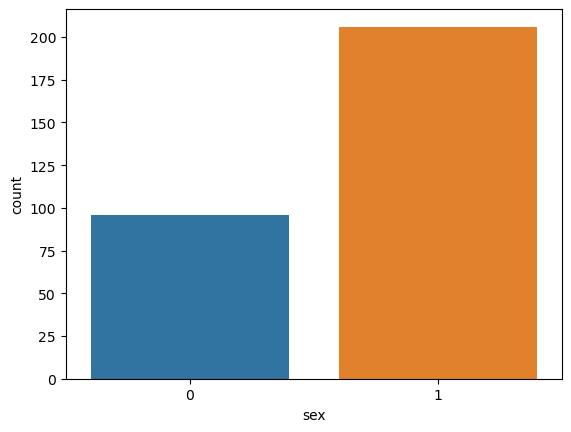

In [22]:
x = (heart_dataset.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=heart_dataset, x="sex")
plt.show()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


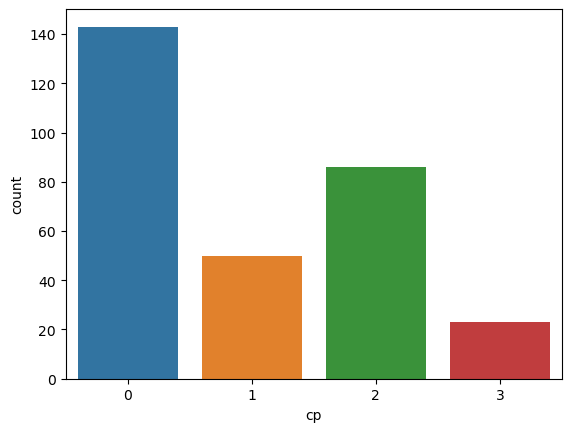

In [9]:
x = (heart_dataset.cp.value_counts())
print(x)
p = sns.countplot(data=heart_dataset, x="cp") # cp = chest pain
plt.show()

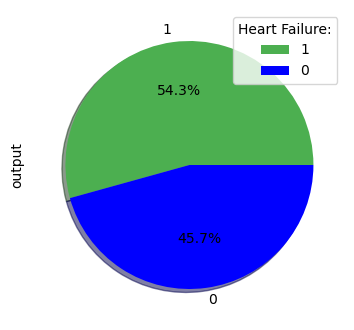

In [28]:
plt.figure(1, figsize=(4,6))
heart_dataset['output'].value_counts().plot.pie(autopct="%1.1f%%",
                                                      colors =( "#4CAF50", "blue"),
                                                      labels = heart_dataset['output'].unique(), 
                                                      shadow = True)
plt.legend(title = "Heart Failure:")
plt.show()

In [36]:
def diagnostic_plots(df, variable: str, target: str):

    # Define figure size.
    plt.figure(figsize=(20, 4))
    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')
    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    plt.show()

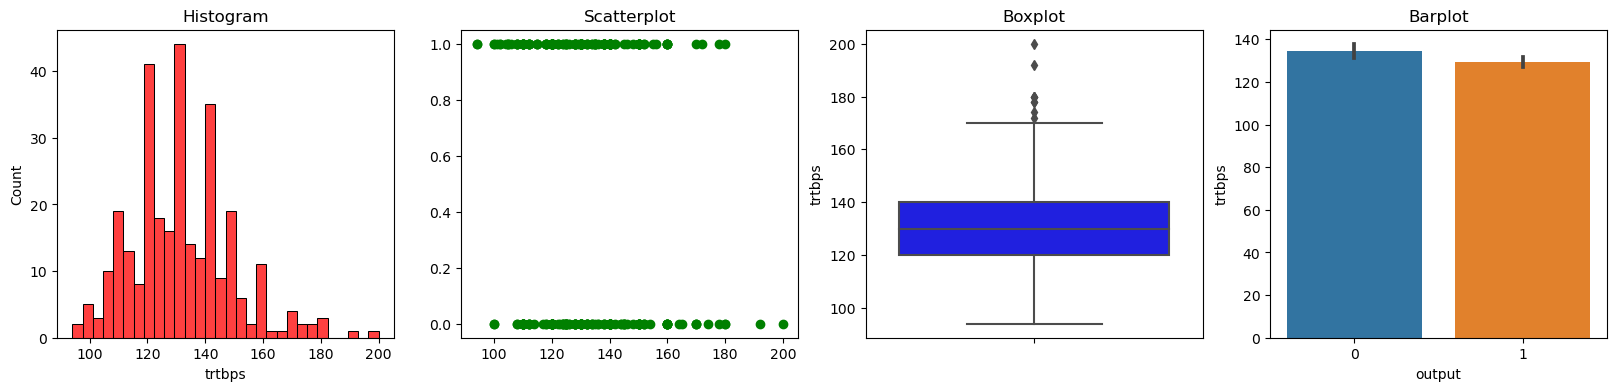

In [37]:
diagnostic_plots(heart_dataset, 'trtbps' , 'output')

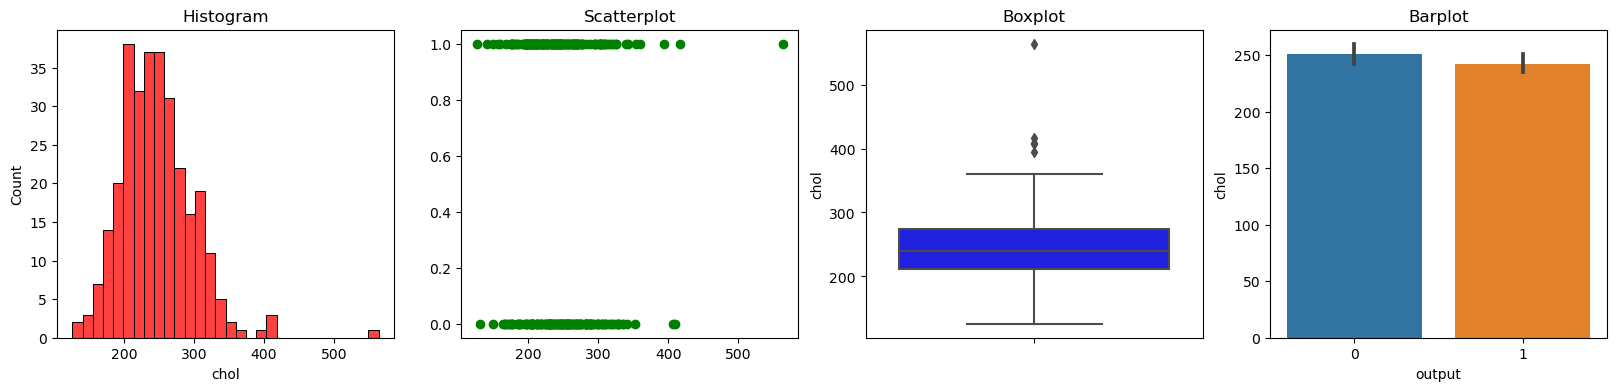

In [38]:
diagnostic_plots(heart_dataset, 'chol' , 'output')

<AxesSubplot:>

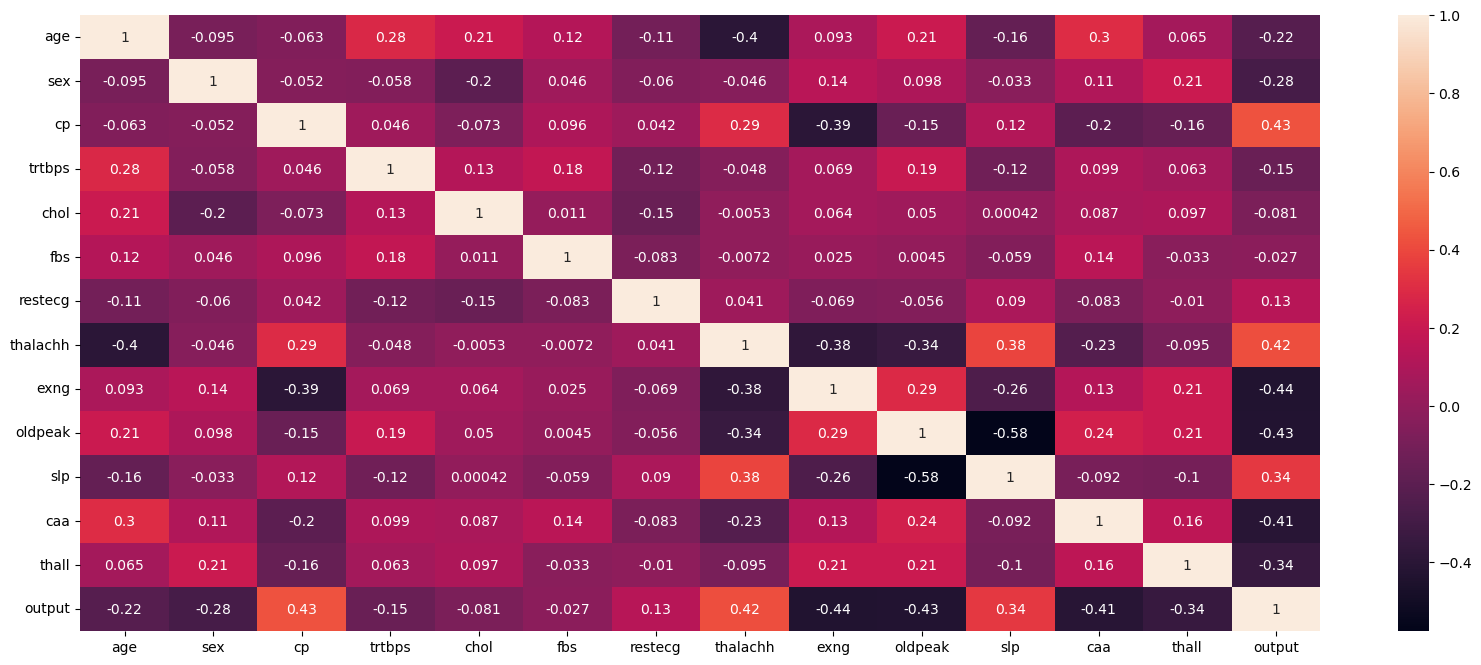

In [40]:
fig = plt.figure(figsize=(20,8))
sns.heatmap(heart_dataset.corr(), annot=True, cmap="rocket")

In [44]:
X = heart_dataset.drop('output', axis=1);
y = heart_dataset['output'];
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 13) (241,)
Shape for testing data (61, 13) (61,)


In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

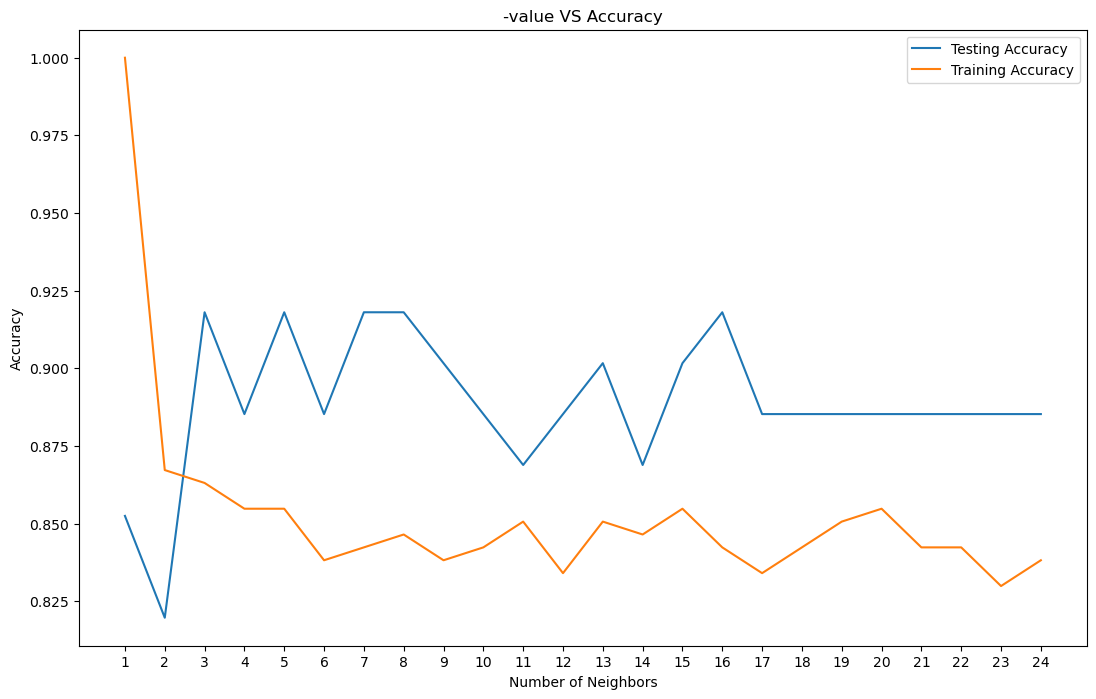

Best accuracy is 0.9180327868852459 with K = 3


In [64]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("The accuracy of KNN is: ", accuracy_score(y_test, y_pred.round())*100, "%")

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.97      0.88      0.92        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

[[26  1]
 [ 4 30]]
The accuracy of KNN is:  91.80327868852459 %


In [71]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
model_prediction = model_tree.predict(x_test)
print(classification_report(y_test,model_prediction))
print(confusion_matrix(y_test, model_prediction))
print("The accuracy of DecisionTreeClassifier is: ", accuracy_score(y_test, model_prediction.round())*100, "%")

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

[[22  5]
 [ 8 26]]
The accuracy of DecisionTreeClassifier is:  78.68852459016394 %


In [75]:
model_svm = svm.SVC(kernel="rbf")
model_svm.fit(x_train,y_train)
svm_prediction=model_svm.predict(x_test)
print(classification_report(y_test,svm_prediction))
print(confusion_matrix(y_test, svm_prediction))
print("The accuracy of Support Vector Machine is: ", accuracy_score(y_test, svm_prediction.round())*100, "%")

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

[[26  1]
 [ 3 31]]
The accuracy of Support Vector Machine is:  93.44262295081968 %


In [76]:
model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(x_train,y_train)
random_forest_pred=model_RF.predict(x_test)
print(classification_report(y_test,random_forest_pred))
print(confusion_matrix(y_test, random_forest_pred))
print("The accuracy of Support Vector Machine is: ", accuracy_score(y_test, random_forest_pred.round())*100, "%")

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[24  3]
 [ 5 29]]
The accuracy of Support Vector Machine is:  86.88524590163934 %


In [77]:
model_ADA=AdaBoostClassifier(learning_rate= 0.15, n_estimators=25)
model_ADA.fit(x_train,y_train)
model_ADA_predict= model_ADA.predict(x_test)
print(classification_report(y_test,model_ADA_predict))
print(confusion_matrix(y_test, model_ADA_predict))
print("The accuracy of Support Vector Machine is: ", accuracy_score(y_test, model_ADA_predict.round())*100, "%")

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[23  4]
 [ 4 30]]
The accuracy of Support Vector Machine is:  86.88524590163934 %


###  SVM is performing the best for the given dataset.